In [24]:
import pandas as pd 
import numpy as np
#import glob
import matplotlib.pyplot as plt

In [2]:
#path =r'C:\Users\623737\Machine_Learning\IPL\Most_Wickets_KKR' # use your path
#allFiles = glob.glob(path + "/*.csv")
#df_ms_wickets = pd.DataFrame()
#list_ = []
#for file_ in allFiles:
#    df = pd.read_csv(file_,index_col=0)
#    team = (file_.rsplit('.csv', 1)[0]).rsplit('_', 2)[1]
#    year = (file_.rsplit('.csv', 1)[0]).rsplit('_', 1)[1]
#    df['team'] = team
#    df['year'] = year
#    list_.append(df)
#df_ms_wickets = pd.concat(list_) """

In [7]:
df_ms_wickets = pd.read_csv('df_ms_wickets_all_team.csv' , index_col = 0)

In [8]:
df_ms_wickets.head(2)

,Player,Mat,Inns,Overs,Mdns,Runs,Wkts,BBI,Ave,Econ,SR,4,5,Ct,St,team,year,status
0,R Ashwin,19,18.0,65.5,0.0,431.0,14.0,3/23,30.78,6.54,28.2,0.0,0.0,5,0,CSK,2012,R
1,KMDN Kulasekara,5,4.0,14.0,0.0,94.0,4.0,2/10,23.50,6.71,21.0,0.0,0.0,4,0,CSK,2012,R


In [9]:
df_ms_wickets[df_ms_wickets.isnull()].head(2)

,Player,Mat,Inns,Overs,Mdns,Runs,Wkts,BBI,Ave,Econ,SR,4,5,Ct,St,team,year,status
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df_ms_wickets.dropna(axis=0,inplace = True)
df_ms_wickets.isnull().sum()

Player    0
Mat       0
Inns      0
Overs     0
Mdns      0
Runs      0
Wkts      0
BBI       0
Ave       0
Econ      0
SR        0
4         0
5         0
Ct        0
St        0
team      0
year      0
status    0
dtype: int64

In [11]:
df_ms_wickets.dtypes

Player     object
Mat         int64
Inns      float64
Overs     float64
Mdns      float64
Runs      float64
Wkts      float64
BBI        object
Ave       float64
Econ      float64
SR        float64
4         float64
5         float64
Ct          int64
St          int64
team       object
year        int64
status     object
dtype: object

In [13]:
#df_ms_wickets[['Ave','Player','SR']][df_ms_wickets['Ave']=='-']

In [14]:
#replacing SR = - with zero
#df_ms_wickets['SR'][df_ms_wickets['SR']=='-'] = 0
#replacing Ave = - with zero
#df_ms_wickets['Ave'][df_ms_wickets['Ave']=='-'] = 0
#df_ms_wickets[['Ave','Player','SR']][df_ms_wickets['Ave']=='-']

In [15]:
#cols = ['Mat' , 'Inns' , 'Mdns' , 'Runs' , 'Wkts' , '4' , '5']
#df_ms_wickets[cols] = df_ms_wickets[cols].astype(int)
#float_col = ['Ave','SR']
#df_ms_wickets[float_col] = df_ms_wickets[float_col].astype(float)
#df_ms_wickets.dtypes

In [10]:
df_ms_wickets = df_ms_wickets.reset_index(drop=True)

# Top 10 Wicket takers for KKR in all Season #

In [16]:
wickets_by_player = df_ms_wickets.groupby('Player', as_index=False).agg({"Wkts": "sum"})
wickets_by_player.sort_values(by = ['Wkts'], ascending=[False]).head(10)

,Player,Wkts
44,B Kumar,108.0
299,SP Narine,95.0
292,SL Malinga,93.0
85,DJ Bravo,90.0
330,UT Yadav,83.0
200,MM Sharma,83.0
116,Harbhajan Singh,79.0
3,A Mishra,73.0
311,Sandeep Sharma,71.0
347,YS Chahal,70.0


# Maximum Wicket Taker in a Season #

In [19]:
df_ms_wickets[df_ms_wickets.Wkts == max(df_ms_wickets.Wkts)][['year','Player','team','Mat','Econ','Overs','Wkts']]

,year,Player,team,Mat,Econ,Overs,Wkts
4,2013,DJ Bravo,CSK,18,7.95,62.3,32.0


# Most Overs bowled by players - Top 10 #

In [20]:
overs_by_player = df_ms_wickets.groupby('Player', as_index=False).agg({"Overs": "sum"})
overs_by_player.sort_values(by = ['Overs'], ascending=[False]).head(10)

,Player,Overs
116,Harbhajan Singh,326.0
299,SP Narine,320.5
44,B Kumar,318.7
330,UT Yadav,279.8
3,A Mishra,270.9
240,R Ashwin,266.0
292,SL Malinga,264.1
200,MM Sharma,254.6
251,RA Jadeja,252.8
233,PP Chawla,244.7


## Top 10 Economical Bowlers in Seasons (minimum 40 overs bowled in a season)  ##

In [28]:
df_ms_wickets[df_ms_wickets.Overs>=40].sort_values(by = 'Econ', ascending = True).head(10)[['year','Player','team','Econ','Overs','Wkts','BBI','status']]

,year,Player,team,Econ,Overs,Wkts,BBI,status
0,2013,SP Narine,KKR,5.46,64.0,22.0,4/13,DQ
1,2012,SP Narine,KKR,5.47,59.1,24.0,5/19,W
1,2013,DW Steyn,SRH,5.66,67.5,19.0,3/11,DQ
0,2013,S Nadeem,DD,5.88,44.0,9.0,2/17,DQ
0,2012,DW Steyn,DC,6.10,46.4,18.0,3/8,DQ
0,2014,AR Patel,KP,6.13,66.0,17.0,3/24,R
0,2012,SL Malinga,MI,6.30,55.3,22.0,4/16,Q
0,2014,SP Narine,KKR,6.35,64.0,21.0,4/20,W
3,2013,A Mishra,SRH,6.35,62.0,21.0,4/19,DQ
0,2013,MM Sharma,CSK,6.43,50.4,20.0,3/10,R


## Top 10 Expensive Bowlers in Seasons (minimum 40 overs bowled in a season)

In [29]:
df_ms_wickets[df_ms_wickets.Overs>=40].sort_values(by = 'Econ', ascending = False).head(10)[['year','Player','Econ','Overs','Wkts','BBI','status']]

,year,Player,Econ,Overs,Wkts,BBI,status
13,2014,JP Faulkner,9.74,43.0,11.0,3/11,DQ
9,2017,Basil Thampi,9.49,44.4,11.0,3/29,DQ
14,2013,AB Dinda,9.48,49.0,16.0,3/31,DQ
9,2015,JP Faulkner,9.46,45.0,8.0,3/26,Q
7,2017,MJ McClenaghan,9.38,54.0,19.0,3/24,W
8,2015,UT Yadav,9.09,42.0,10.0,3/33,DQ
5,2015,Anureet Singh,9.00,51.4,15.0,3/23,DQ
7,2017,MM Sharma,8.97,45.4,13.0,2/24,DQ
8,2015,YS Chahal,8.86,46.5,23.0,3/40,Q
7,2016,DJ Bravo,8.82,56.0,17.0,4/22,Q


# Mean Wickets Taken by Qualified Teams

In [37]:
wkts_by_seasons = df_ms_wickets.groupby(['year','team','status'], as_index=False).agg({"Wkts": "sum"})
print(np.mean(wkts_by_seasons[wkts_by_seasons.status !='DQ'].Wkts))

91.1304347826087


# Mean Wickets Taken by Not Qualified Teams

In [39]:
print(np.mean(wkts_by_seasons[wkts_by_seasons.status =='DQ'].Wkts))

73.18518518518519


# Mean Wickets Taken by Winning Teams

In [42]:
print(np.mean(wkts_by_seasons[wkts_by_seasons.status =='W'].Wkts))

94.66666666666667


# Bowling Details Per Seaon

In [60]:
bowling_by_seaons = df_ms_wickets.groupby(['year','team','status'], as_index=False).agg({"Overs": "sum","Mdns": "sum","Runs":"sum","Wkts":"sum","Econ": "mean","SR": "mean","4":"sum","5":"sum"}) 
bowling_by_seaons.head(5)

,year,team,status,Overs,Mdns,Runs,Wkts,Econ,SR,4,5
0,2012,CSK,R,338.4,2.0,2573.0,94.0,5.456471,13.435294,0.0,1.0
1,2012,DC,DQ,290.5,2.0,2361.0,78.0,5.271667,17.262500,0.0,0.0
2,2012,DD,Q,345.2,5.0,2702.0,85.0,6.569545,15.254545,2.0,0.0
3,2012,KKR,W,330.2,3.0,2315.0,95.0,5.592778,15.311111,2.0,1.0
4,2012,KP,DQ,311.3,3.0,2394.0,86.0,5.880909,10.354545,2.0,1.0


# Stats About Champion Teams

In [59]:
bowling_by_seaons[bowling_by_seaons['status']=='W']

,year,team,status,Overs,Mdns,Runs,Wkts,Econ,SR,4,5
3,2012,KKR,W,330.2,3.0,2315.0,95.0,5.592778,15.311111,2.0,1.0
13,2013,MI,W,368.0,1.0,2762.0,117.0,6.112273,12.059091,0.0,0.0
20,2014,KKR,W,316.3,3.0,2379.0,83.0,5.668824,15.011765,2.0,0.0
30,2015,MI,W,312.8,5.0,2665.0,86.0,5.998000,15.225000,1.0,0.0
41,2016,SRH,W,323.2,5.0,2544.0,88.0,5.964444,12.088889,1.0,0.0
46,2017,MI,W,329.6,4.0,2593.0,99.0,5.395000,11.116667,1.0,0.0


In [51]:
print('Avg Economy Rate for Winning Teams:')
print(round(np.mean(bowling_by_seaons[bowling_by_seaons['status']=='W'].Econ),2))
print('Avg SR for Winning Teams:')
print(round(np.mean(bowling_by_seaons[bowling_by_seaons['status']=='W'].SR),2))

Avg Economy Rate for Winning Teams:
5.79
Avg SR for Winning Teams:
13.47


In [62]:
print('Avg Economy Rate for not qualified Teams:')
print(round(np.mean(bowling_by_seaons[bowling_by_seaons['status']=='DQ'].Econ),2))
print('Avg SR for not qualified Teams:')
print(round(np.mean(bowling_by_seaons[bowling_by_seaons['status']=='DQ'].SR),2))

Avg Economy Rate for not qualified Teams:
5.64
Avg SR for not qualified Teams:
14.09


# IPL Seasonwise Bowling Performence , Cumulative

In [52]:
bowling_seaons_cumulative = df_ms_wickets.groupby('year', as_index=False).agg({"Overs": "sum","Mdns": "sum","Runs":"sum","Wkts":"sum","Econ": "mean","SR": "mean","4":"sum","5":"sum"}) 
bowling_seaons_cumulative

,year,Overs,Mdns,Runs,Wkts,Econ,SR,4,5
0,2012,2862.0,26.0,21995.0,772.0,5.937105,13.316842,15.0,3.0
1,2013,2926.9,36.0,22082.0,829.0,5.327980,13.215152,7.0,3.0
2,2014,2300.5,18.0,18466.0,606.0,5.797763,16.287500,12.0,0.0
3,2015,2185.3,23.0,17995.0,624.0,5.903310,16.236552,14.0,0.0
4,2016,2264.6,19.0,18553.0,591.0,5.742767,15.238365,13.0,1.0
5,2017,2223.4,13.0,18427.0,650.0,6.020186,14.491925,7.0,3.0


# Bowlers took most tickets in Season 2012 & 2013

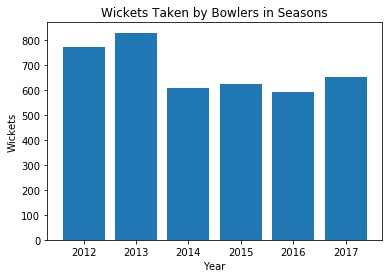

In [57]:
wickets = bowling_seaons_cumulative['Wkts']
Year = bowling_seaons_cumulative['year']
y_pos = np.arange(len(Year))
plt.bar(y_pos,wickets)
plt.xticks(y_pos,Year) 
plt.ylabel('Wickets')
plt.xlabel('Year')
plt.title('Wickets Taken by Bowlers in Seasons')
plt.show()